In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
quiz_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv")

In [4]:
print(quiz_data.info)

<bound method DataFrame.info of                       date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.79

In [5]:
quiz_data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [6]:
column_names = {'T1':'Temperature in kitchen area',
            'RH_1':'Humidity in kitchen area',
              'T2':'Temperature in living room area',
            'RH_2':'Humidity in living room area',
              'T3':'Temperature in laundry room area',
            'RH_3':'Humidity in laundry room area',
              'T4': 'Temperature in office room',
            'RH_4': 'Humidity in office room',
            'T5'  :'Temperature in bathroom',
            'RH_5': 'Humidity in bathroom',
            'T6'  :'Temperature outside the building',
            'RH_6': 'Humidity outside the building',
              'T7': 'Temperature in ironing room' ,
            'RH_7':'Humidity in ironing room',
              'T8':'Temperature in teenager room 2',
            'RH_8':'Humidity in teenager room 2',
              'T9':'Temperature in parents room',
            'RH_9':'Humidity in parents room',
              'To':'Temperature outside (from Chievres weather station)',
     'Press_mm_hg':'Pressure (from Chievres weather station)',
          "RH_out":'Humidity outside (from Chievres weather station)',
       'Windspeed':' Windspeed (from Chievres weather station)',
      'Visibility':' Visibility (from Chievres weather station)',
       'Tdewpoint':' Tdewpoint (from Chievres weather station)',
             'rv1': 'Random variable 1, nondimensional',
             'rv2':'Random variable 2, nondimensiona',}
quiz_data_for_use = quiz_data.rename(columns = column_names)
quiz_data_for_use.head()

date  Appliances  lights  Temperature in kitchen area  \
0  2016-01-11 17:00:00          60      30                        19.89   
1  2016-01-11 17:10:00          60      30                        19.89   
2  2016-01-11 17:20:00          50      30                        19.89   
3  2016-01-11 17:30:00          50      40                        19.89   
4  2016-01-11 17:40:00          60      40                        19.89   

   Humidity in kitchen area  Temperature in living room area  \
0                 47.596667                             19.2   
1                 46.693333                             19.2   
2                 46.300000                             19.2   
3                 46.066667                             19.2   
4                 46.333333                             19.2   

   Humidity in living room area  Temperature in laundry room area  \
0                     44.790000                             19.79   
1                     44.722500                             19.79   
2                     44.626667                             19.79   
3                     44.590000                             19.79   
4                     44.530000                             19.79   

   Humidity in laundry room area  Temperature in office room  ...  \
0                      44.730000                   19.000000  ...   
1                      44.790000                   19.000000  ...   
2                      44.933333                   18.926667  ...   
3                      45.000000                   18.890000  ...   
4                      45.000000                   18.890000  ...   

   Temperature in parents room  Humidity in parents room     T_out  \
0                    17.033333                     45.53  6.600000   
1                    17.066667                     45.56  6.483333   
2                    17.000000                     45.50  6.366667   
3                    17.000000                     45.40  6.250000   
4                    17.000000                     45.40  6.133333   

   Pressure (from Chievres weather station)  \
0                                     733.5   
1                                     733.6   
2                                     733.7   
3                                     733.8   
4                                     733.9   

   Humidity outside (from Chievres weather station)  \
0                                              92.0   
1                                              92.0   
2                                              92.0   
3                                              92.0   
4                                              92.0   

    Windspeed (from Chievres weather station)  \
0                                    7.000000   
1                                    6.666667   
2                                    6.333333   
3                                    6.000000   
4                                    5.666667   

    Visibility (from Chievres weather station)  \
0                                    63.000000   
1                                    59.166667   
2                                    55.333333   
3                                    51.500000   
4                                    47.666667   

    Tdewpoint (from Chievres weather station)  \
0                                         5.3   
1                                         5.2   
2                                         5.1   
3                                         5.0   
4                                         4.9   

   Random variable 1, nondimensional  Random variable 2, nondimensiona  
0                          13.275433                         13.275433  
1                          18.606195                         18.606195  
2                          28.642668                         28.642668  
3                          45.410389                         45.410389  
4                          10.084097                         

In [7]:
quiz_data_for_use.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   date                                              19735 non-null  object 
 1   Appliances                                        19735 non-null  int64  
 2   lights                                            19735 non-null  int64  
 3   Temperature in kitchen area                       19735 non-null  float64
 4   Humidity in kitchen area                          19735 non-null  float64
 5   Temperature in living room area                   19735 non-null  float64
 6   Humidity in living room area                      19735 non-null  float64
 7   Temperature in laundry room area                  19735 non-null  float64
 8   Humidity in laundry room area                     19735 non-null  float64
 9   Temperature in of

In [10]:
quiz_data_for_use.describe()

Appliances        lights  Temperature in kitchen area  \
count  19735.000000  19735.000000                 19735.000000   
mean      97.694958      3.801875                    21.686571   
std      102.524891      7.935988                     1.606066   
min       10.000000      0.000000                    16.790000   
25%       50.000000      0.000000                    20.760000   
50%       60.000000      0.000000                    21.600000   
75%      100.000000      0.000000                    22.600000   
max     1080.000000     70.000000                    26.260000   

       Humidity in kitchen area  Temperature in living room area  \
count              19735.000000                     19735.000000   
mean                  40.259739                        20.341219   
std                    3.979299                         2.192974   
min                   27.023333                        16.100000   
25%                   37.333333                        18.790000   
50%                   39.656667                        20.000000   
75%                   43.066667                        21.500000   
max                   63.360000                        29.856667   

       Humidity in living room area  Temperature in laundry room area  \
count                  19735.000000                      19735.000000   
mean                      40.420420                         22.267611   
std                        4.069813                          2.006111   
min                       20.463333                         17.200000   
25%                       37.900000                         20.790000   
50%                       40.500000                         22.100000   
75%                       43.260000                         23.290000   
max                       56.026667                         29.236000   

       Humidity in laundry room area  Temperature in office room  \
count                   19735.000000                19735.000000   
mean                       39.242500                   20.855335   
std                         3.254576                    2.042884   
min                        28.766667                   15.100000   
25%                        36.900000                   19.530000   
50%                        38.530000                   20.666667   
75%                        41.760000                   22.100000   
max                        50.163333                   26.200000   

       Humidity in office room  ...  Temperature in parents room  \
count             19735.000000  ...                 19735.000000   
mean                 39.026904  ...                    19.485828   
std                   4.341321  ...                     2.014712   
min                  27.660000  ...                    14.890000   
25%                  35.530000  ...                    18.000000   
50%                  38.400000  ...                    19.390000   
75%                  42.156667  ...                    20.600000   
max                  51.090000  ...                    24.500000   

       Humidity in parents room         T_out  \
count              19735.000000  19735.000000   
mean                  41.552401      7.411665   
std                    4.151497      5.317409   
min                   29.166667     -5.000000   
25%                   38.500000      3.666667   
50%                   40.900000      6.916667   
75%                   44.338095     10.408333   
max                   53.326667     26.100000   

       Pressure (from Chievres weather station)  \
count                              19735.000000   
mean                                 755.522602   
std                                    7.399441   
min                                  729.300000   
25%                                  750.933333   
50%                                  756.100000   
75%                                  760.933333   
max                                  772.300000   

       Humidity

#EXPLORATORY DATA ANALYSIS


In [11]:
def visuals(x_var , y_var):
    fig, axes = plt.subplots(1,3, figsize=(16,5))
    
    simple_linear_reg_df = quiz_data_for_use[[x_var,y_var]].sample(100, random_state=2)
    reg = sns.regplot(x=x_var, y=y_var, data = simple_linear_reg_df, ax=axes[0])
    
    
    box = sns.boxplot(y=x_var, data = quiz_data_for_use, orient="v", ax=axes[1])
    
    sns.distplot(quiz_data_for_use[x_var], fit=norm)

    (mu, sigma) = norm.fit(quiz_data_for_use[x_var])
    print("\n mu = {:.2f} and sigma = {:.2f}\n".format(mu,sigma))

    plt.legend(["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})".format(mu, sigma)], loc="best")

    plt.ylabel("Frequency")
    plt.xlabel(x_var)

    #QQ-plot
    fig = plt.figure()
    res = stats.probplot(quiz_data_for_use[x_var], plot=plt)
    
    
    return reg, box, plt.show()

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 97.69 and sigma = 102.52



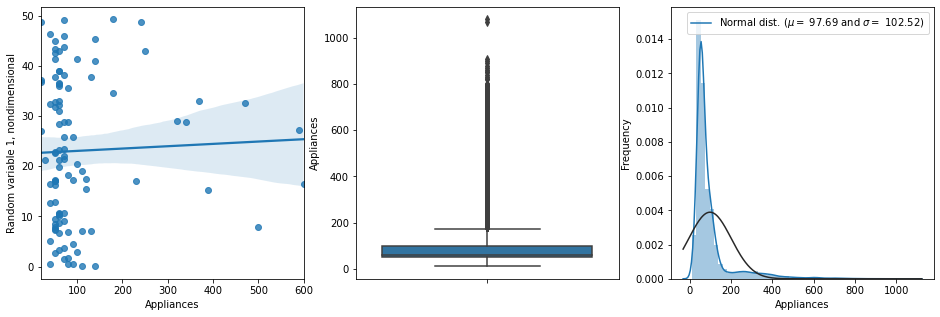

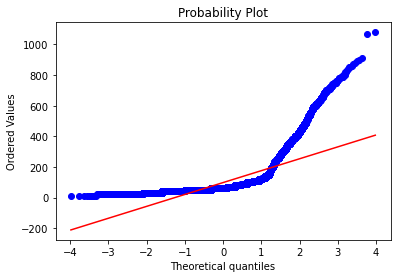

(<AxesSubplot:xlabel='Appliances', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Appliances'>,
 None)

In [12]:
visuals("Appliances",'Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 97.69 and sigma = 102.52



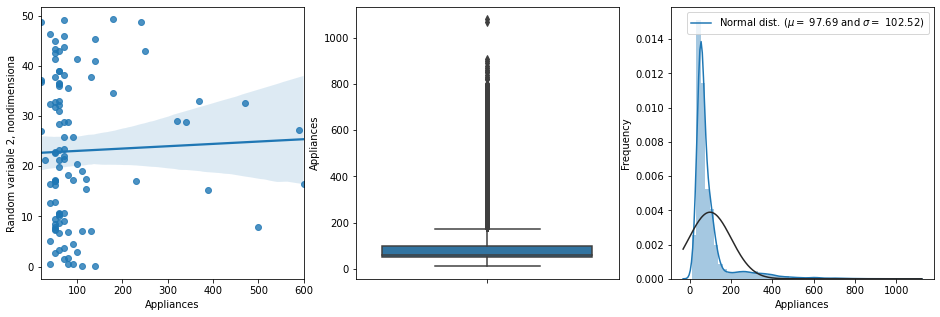

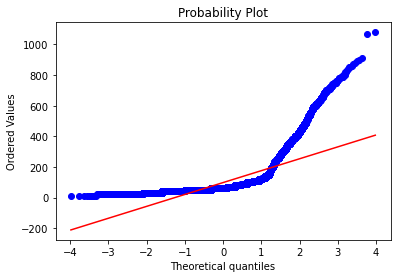

(<AxesSubplot:xlabel='Appliances', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Appliances'>,
 None)

In [13]:
visuals("Appliances","Random variable 2, nondimensiona")

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 3.80 and sigma = 7.94



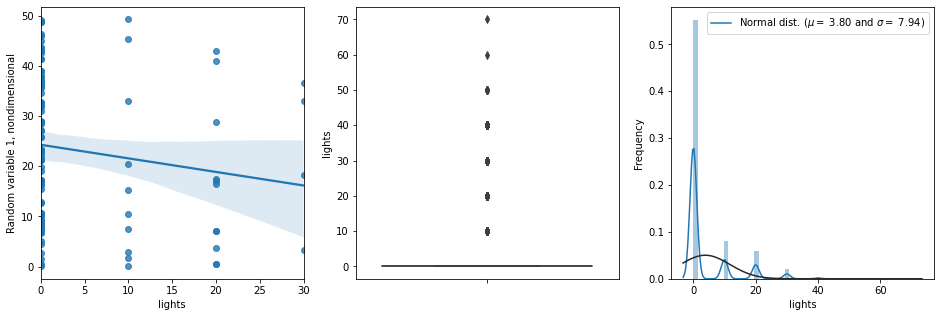

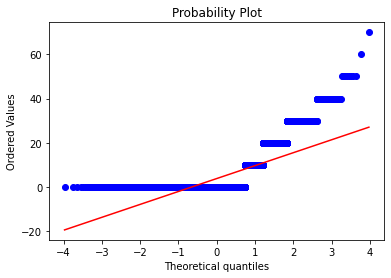

(<AxesSubplot:xlabel='lights', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='lights'>,
 None)

In [14]:
visuals("lights",'Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 3.80 and sigma = 7.94



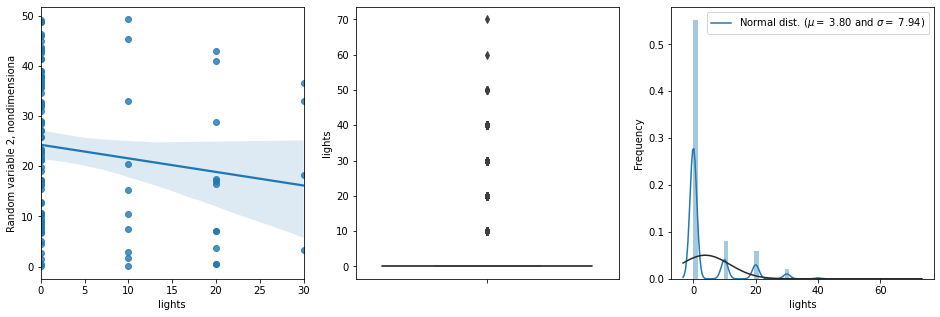

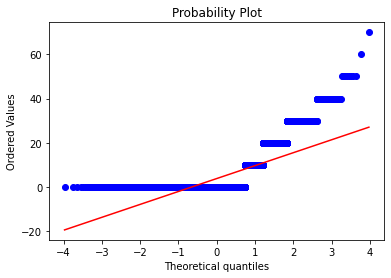

(<AxesSubplot:xlabel='lights', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='lights'>,
 None)

In [15]:
visuals("lights",'Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 21.69 and sigma = 1.61



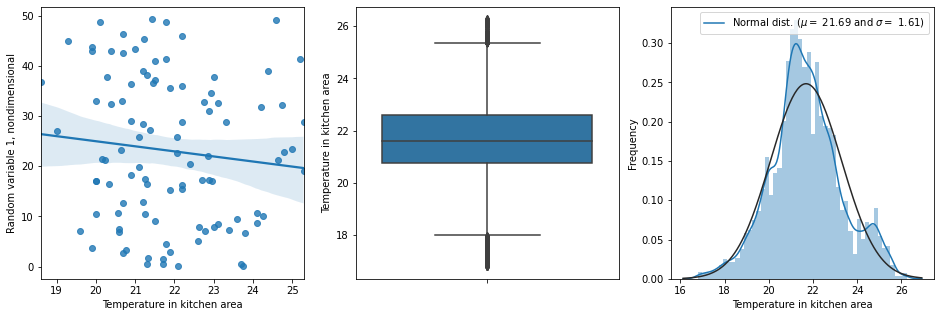

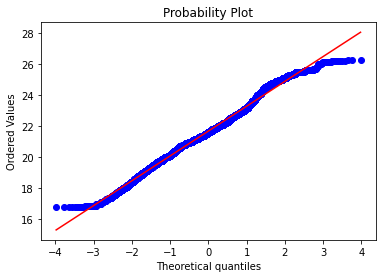

(<AxesSubplot:xlabel='Temperature in kitchen area', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Temperature in kitchen area'>,
 None)

In [16]:
visuals('Temperature in kitchen area','Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 21.69 and sigma = 1.61



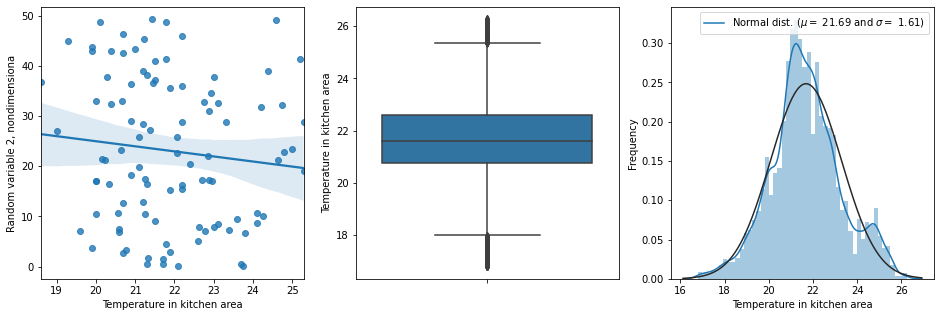

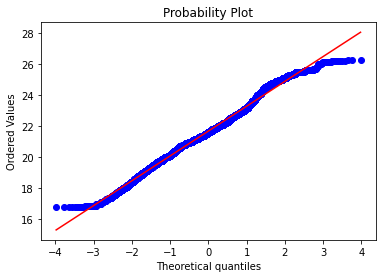

(<AxesSubplot:xlabel='Temperature in kitchen area', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Temperature in kitchen area'>,
 None)

In [17]:
visuals('Temperature in kitchen area','Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 40.26 and sigma = 3.98



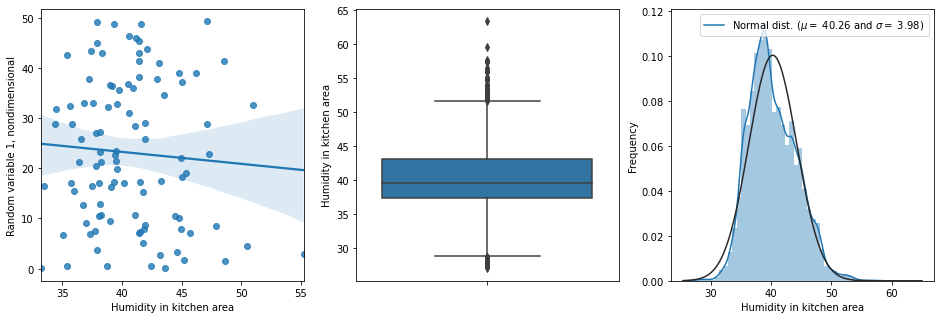

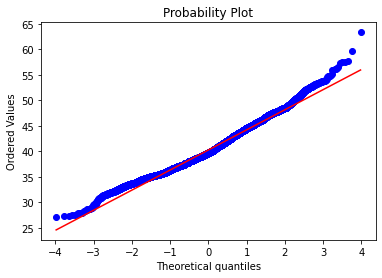

(<AxesSubplot:xlabel='Humidity in kitchen area', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Humidity in kitchen area'>,
 None)

In [18]:
visuals('Humidity in kitchen area','Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 40.26 and sigma = 3.98



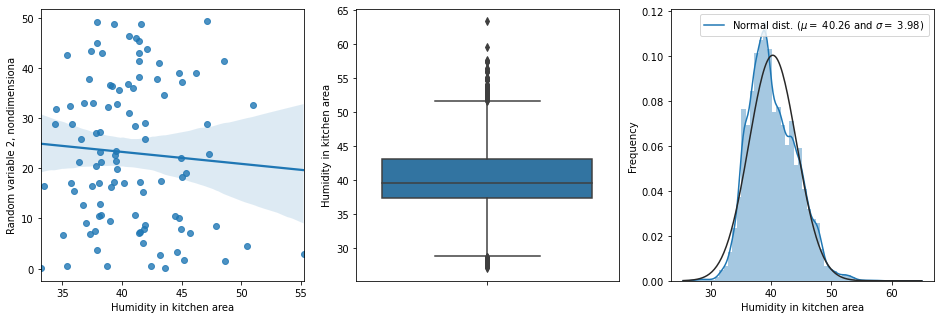

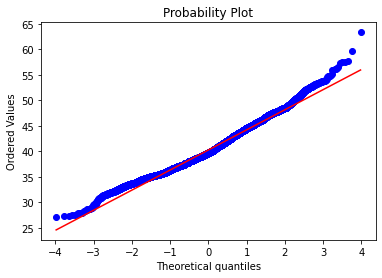

(<AxesSubplot:xlabel='Humidity in kitchen area', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Humidity in kitchen area'>,
 None)

In [19]:
visuals('Humidity in kitchen area','Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 20.34 and sigma = 2.19



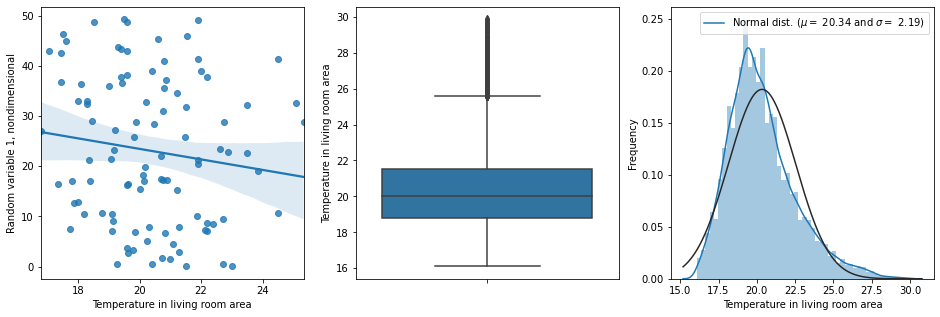

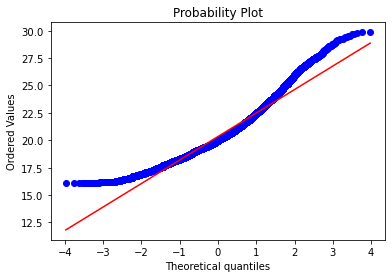

(<AxesSubplot:xlabel='Temperature in living room area', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Temperature in living room area'>,
 None)

In [20]:
visuals('Temperature in living room area','Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 20.34 and sigma = 2.19



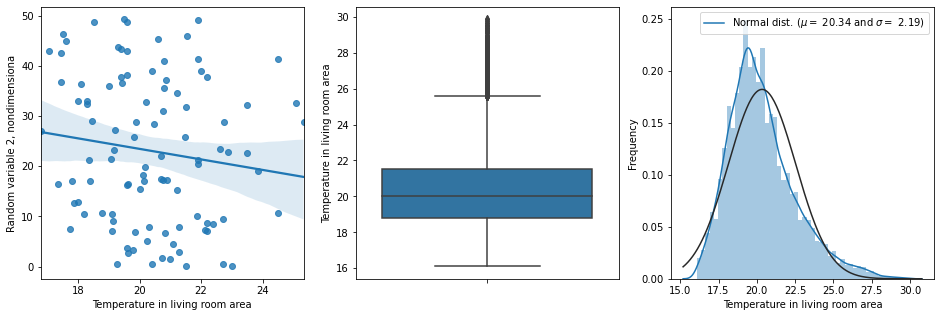

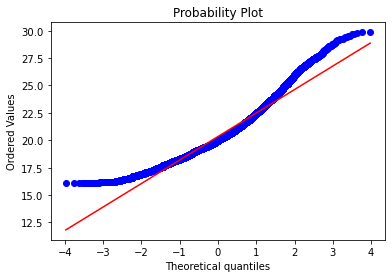

(<AxesSubplot:xlabel='Temperature in living room area', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Temperature in living room area'>,
 None)

In [21]:
visuals('Temperature in living room area','Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 40.42 and sigma = 4.07



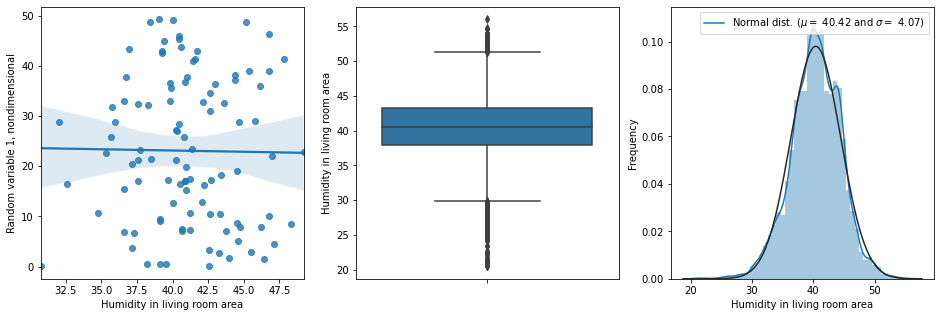

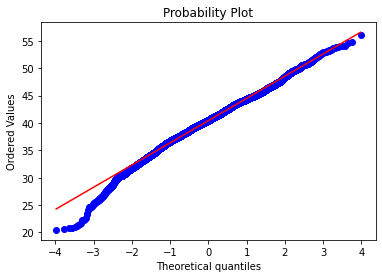

(<AxesSubplot:xlabel='Humidity in living room area', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Humidity in living room area'>,
 None)

In [22]:
visuals('Humidity in living room area','Random variable 1, nondimensional',)

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 40.42 and sigma = 4.07



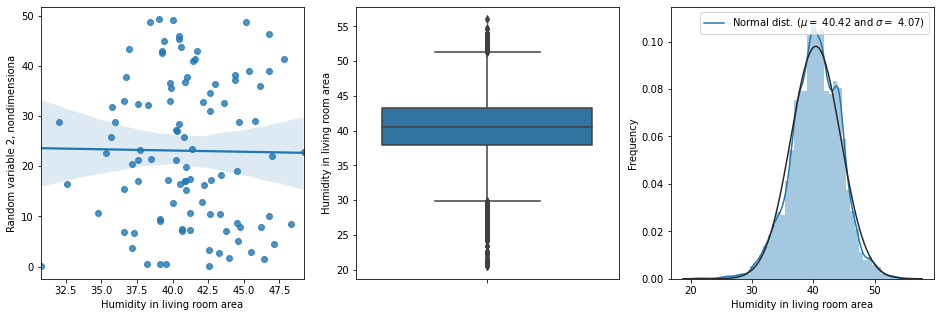

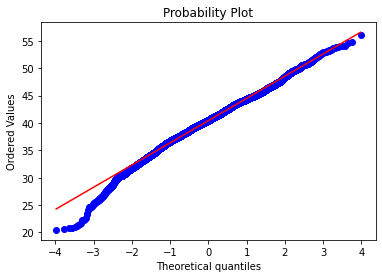

(<AxesSubplot:xlabel='Humidity in living room area', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Humidity in living room area'>,
 None)

In [24]:
visuals('Humidity in living room area',
'Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 22.27 and sigma = 2.01



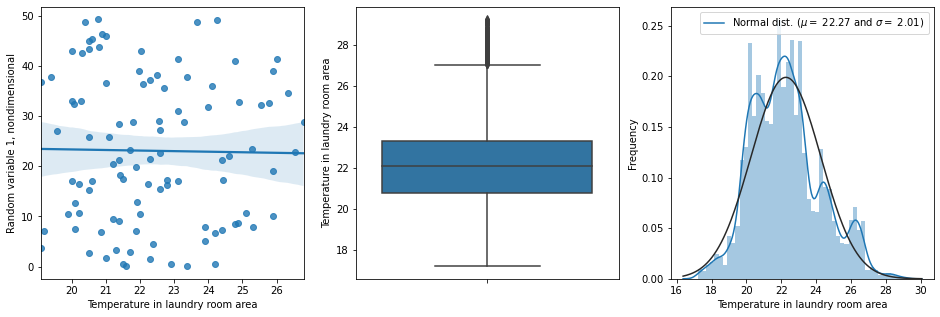

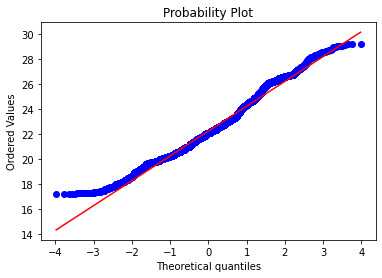

(<AxesSubplot:xlabel='Temperature in laundry room area', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Temperature in laundry room area'>,
 None)

In [25]:
visuals('Temperature in laundry room area',
'Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 22.27 and sigma = 2.01



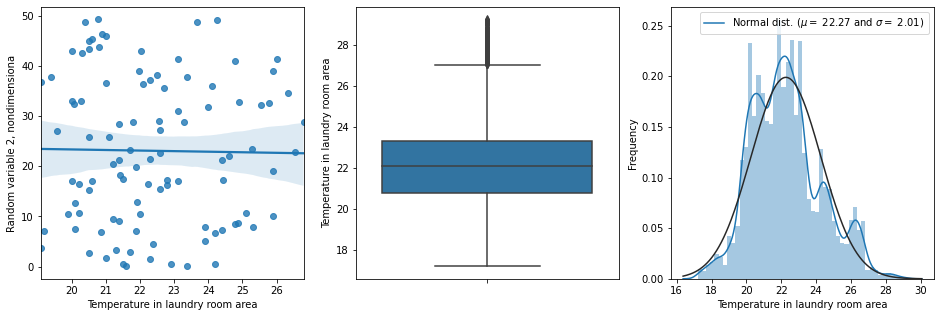

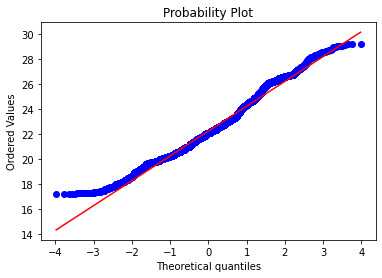

(<AxesSubplot:xlabel='Temperature in laundry room area', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Temperature in laundry room area'>,
 None)

In [26]:
visuals('Temperature in laundry room area',
'Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 39.24 and sigma = 3.25



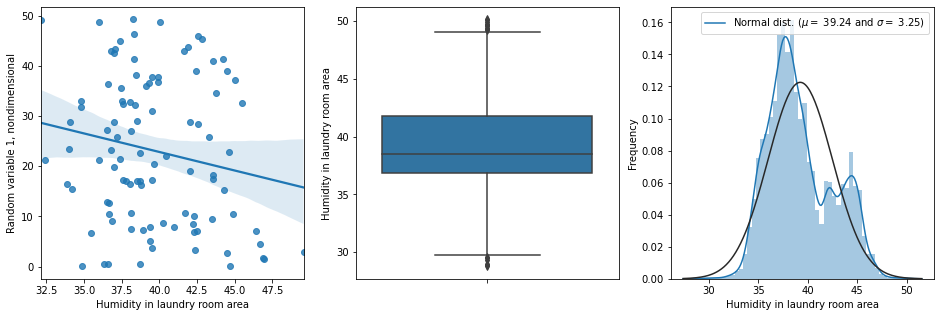

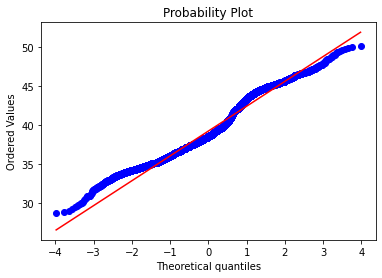

(<AxesSubplot:xlabel='Humidity in laundry room area', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Humidity in laundry room area'>,
 None)

In [27]:
visuals('Humidity in laundry room area',
'Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 39.24 and sigma = 3.25



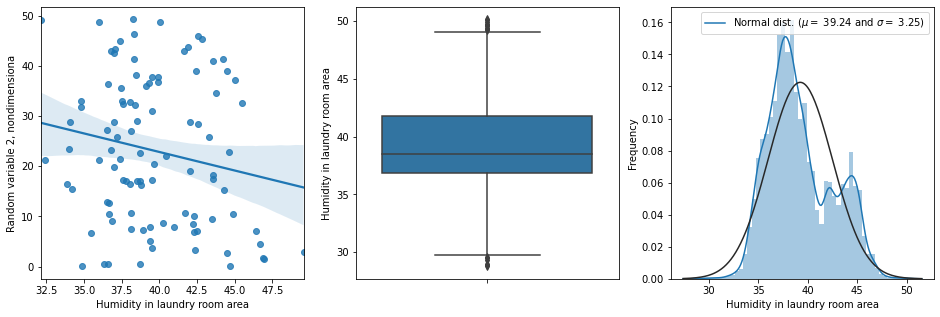

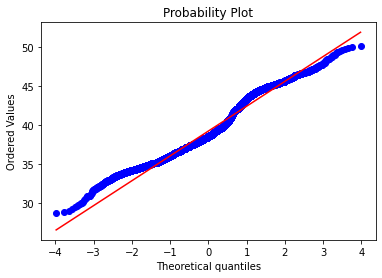

(<AxesSubplot:xlabel='Humidity in laundry room area', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Humidity in laundry room area'>,
 None)

In [28]:
visuals('Humidity in laundry room area','Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 20.86 and sigma = 2.04



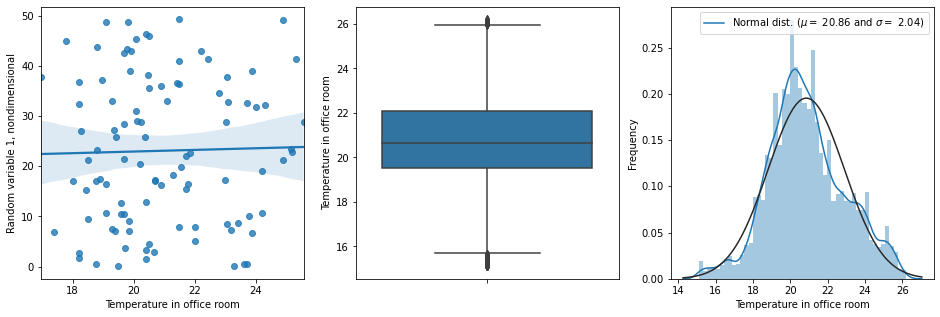

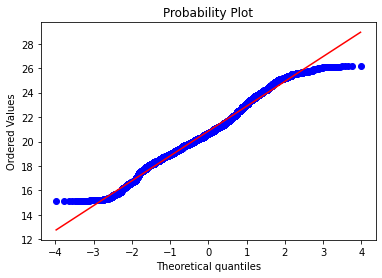

(<AxesSubplot:xlabel='Temperature in office room', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Temperature in office room'>,
 None)

In [29]:
visuals('Temperature in office room',
'Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 20.86 and sigma = 2.04



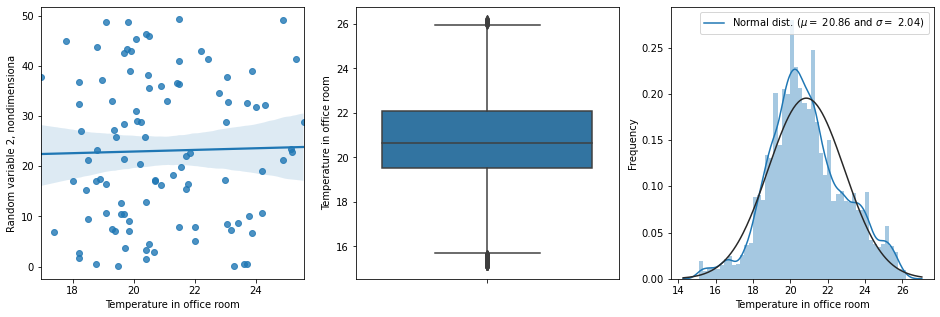

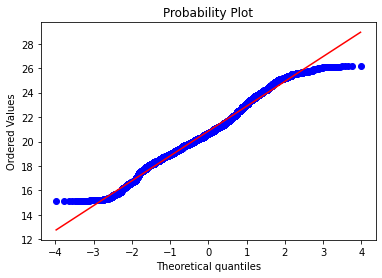

(<AxesSubplot:xlabel='Temperature in office room', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Temperature in office room'>,
 None)

In [30]:
visuals('Temperature in office room',
'Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 39.03 and sigma = 4.34



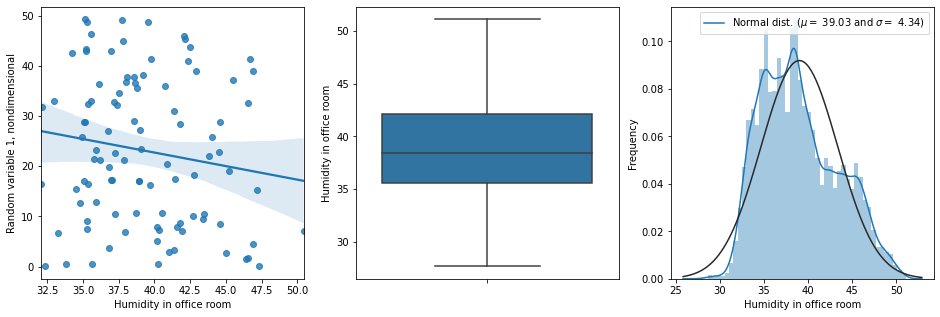

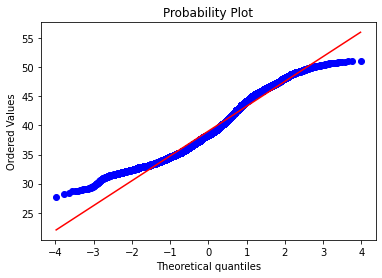

(<AxesSubplot:xlabel='Humidity in office room', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Humidity in office room'>,
 None)

In [31]:
visuals('Humidity in office room',

'Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 39.03 and sigma = 4.34



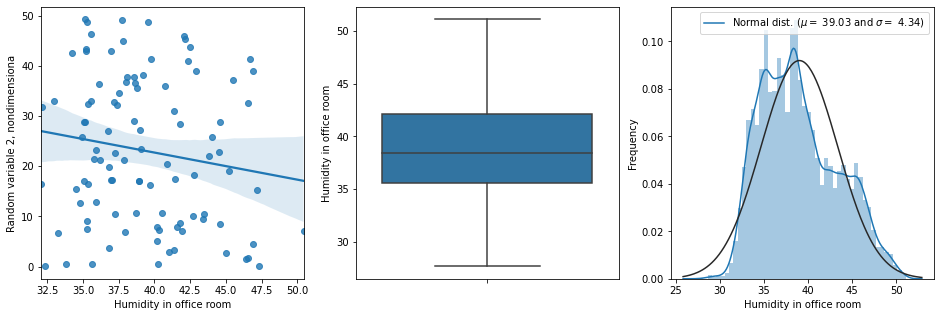

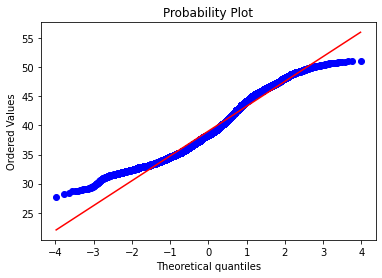

(<AxesSubplot:xlabel='Humidity in office room', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Humidity in office room'>,
 None)

In [32]:
visuals('Humidity in office room',
'Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 19.59 and sigma = 1.84



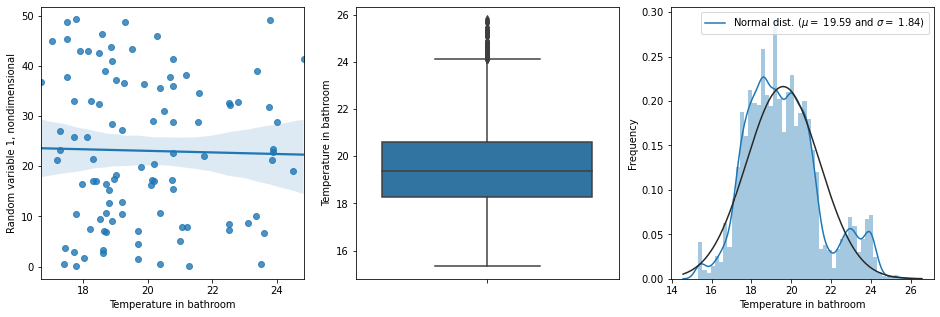

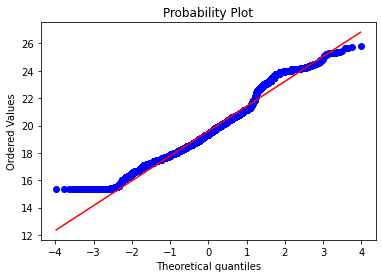

(<AxesSubplot:xlabel='Temperature in bathroom', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Temperature in bathroom'>,
 None)

In [34]:
visuals('Temperature in bathroom',

'Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 19.59 and sigma = 1.84



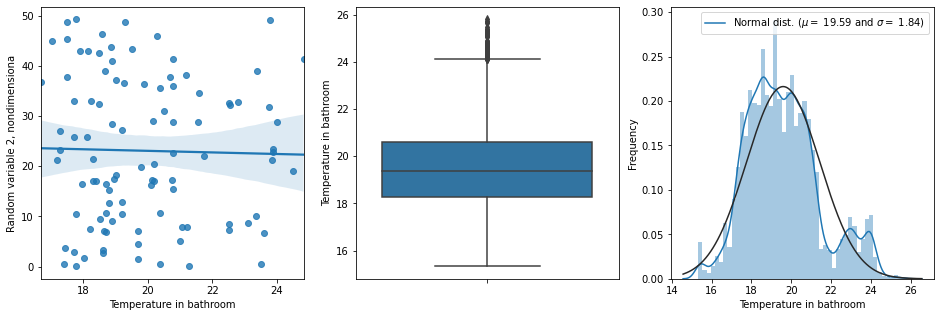

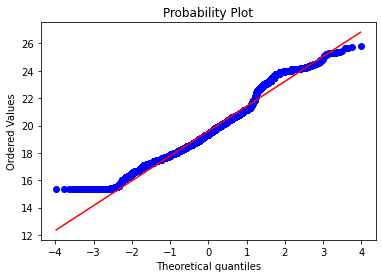

(<AxesSubplot:xlabel='Temperature in bathroom', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Temperature in bathroom'>,
 None)

In [35]:
visuals('Temperature in bathroom',
'Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 50.95 and sigma = 9.02



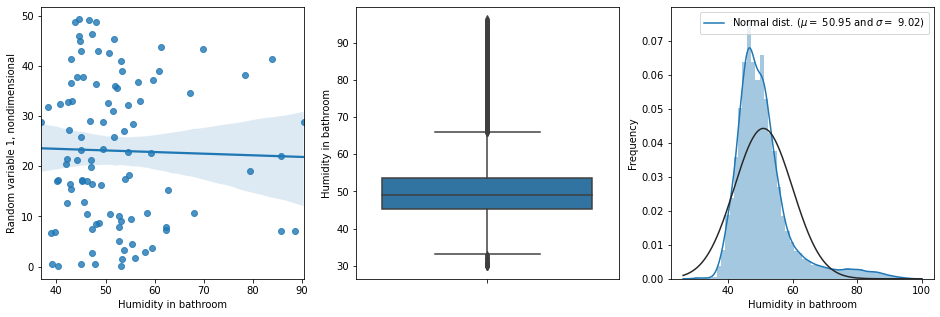

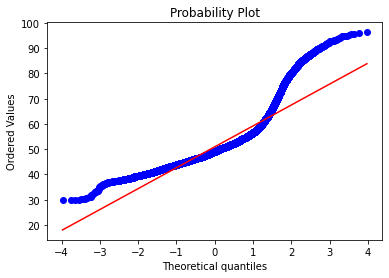

(<AxesSubplot:xlabel='Humidity in bathroom', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Humidity in bathroom'>,
 None)

In [37]:
visuals('Humidity in bathroom',

'Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 50.95 and sigma = 9.02



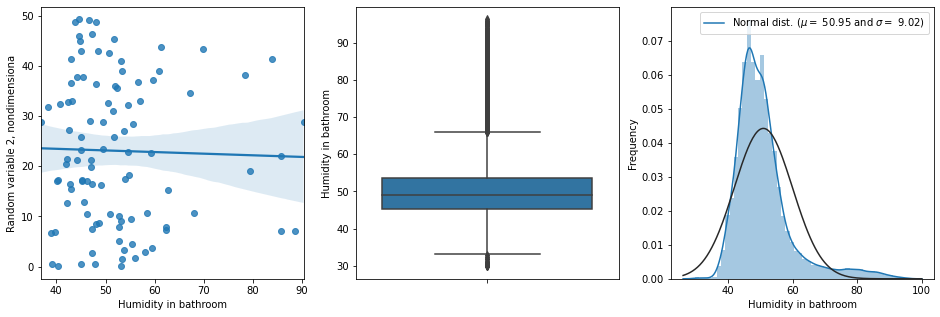

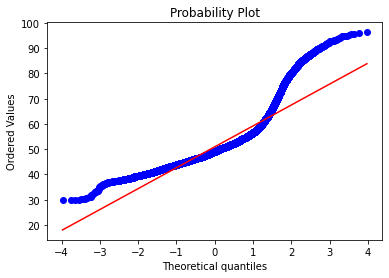

(<AxesSubplot:xlabel='Humidity in bathroom', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Humidity in bathroom'>,
 None)

In [38]:
visuals('Humidity in bathroom','Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 7.91 and sigma = 6.09



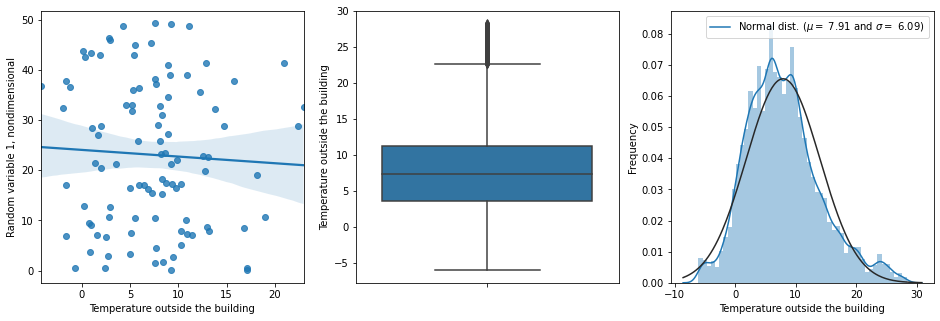

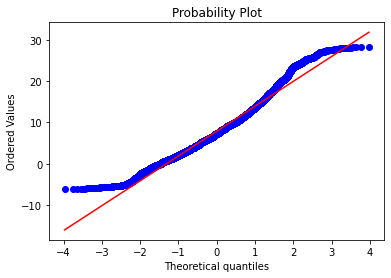

(<AxesSubplot:xlabel='Temperature outside the building', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Temperature outside the building'>,
 None)

In [39]:
visuals('Temperature outside the building','Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 7.91 and sigma = 6.09



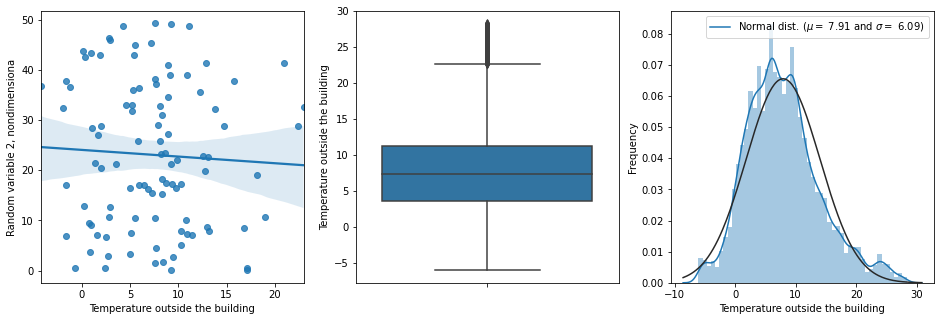

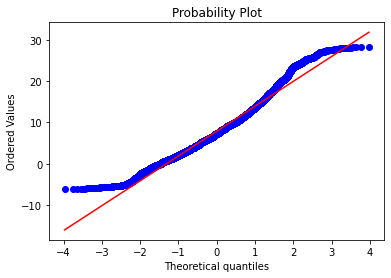

(<AxesSubplot:xlabel='Temperature outside the building', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Temperature outside the building'>,
 None)

In [40]:
visuals('Temperature outside the building','Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 54.61 and sigma = 31.15



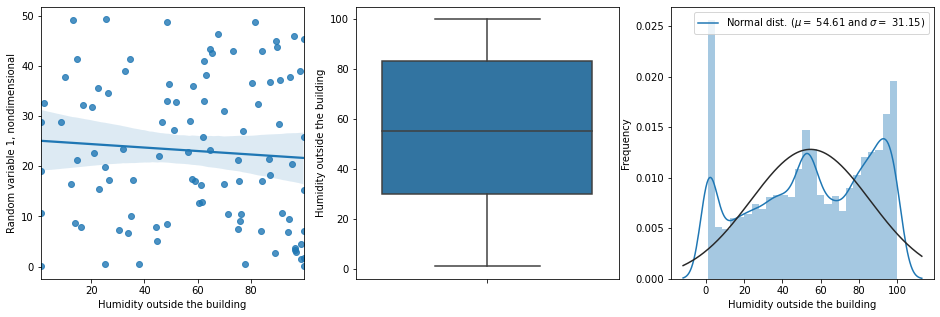

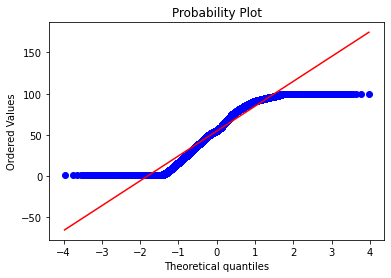

(<AxesSubplot:xlabel='Humidity outside the building', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Humidity outside the building'>,
 None)

In [41]:
visuals('Humidity outside the building',
'Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 54.61 and sigma = 31.15



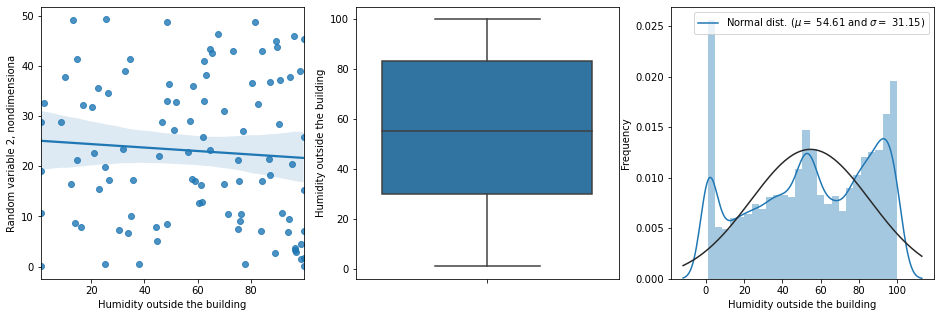

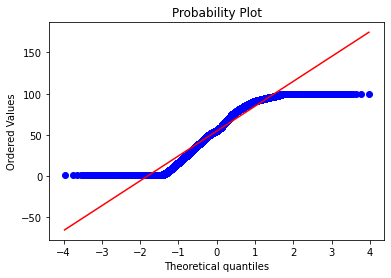

(<AxesSubplot:xlabel='Humidity outside the building', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Humidity outside the building'>,
 None)

In [42]:
visuals('Humidity outside the building','Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 20.27 and sigma = 2.11



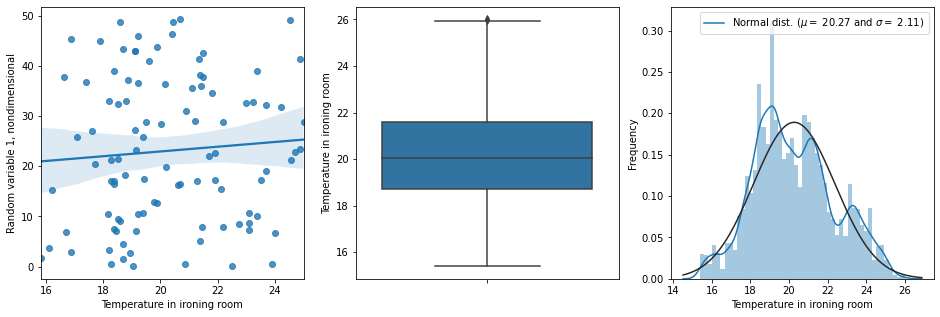

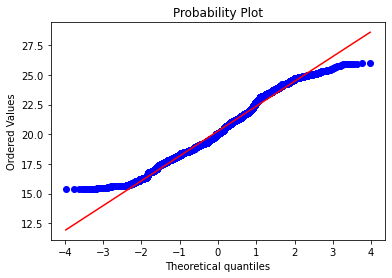

(<AxesSubplot:xlabel='Temperature in ironing room', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Temperature in ironing room'>,
 None)

In [43]:
visuals('Temperature in ironing room','Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 20.27 and sigma = 2.11



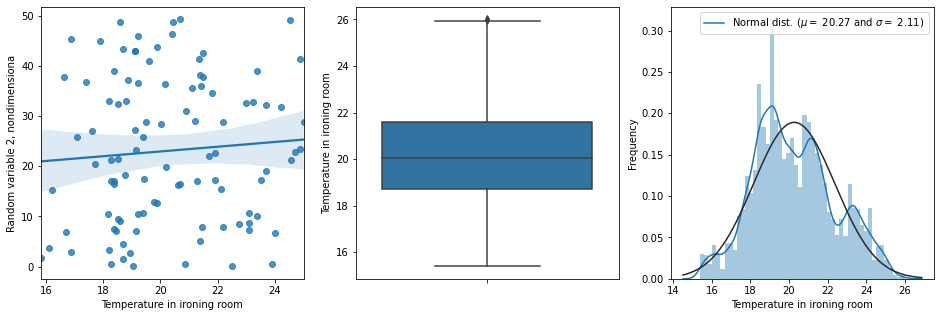

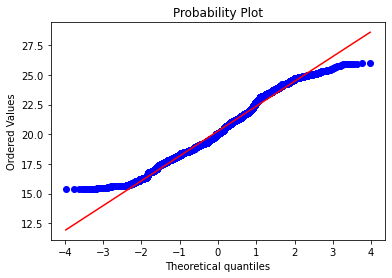

(<AxesSubplot:xlabel='Temperature in ironing room', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Temperature in ironing room'>,
 None)

In [44]:
visuals('Temperature in ironing room','Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 35.39 and sigma = 5.11



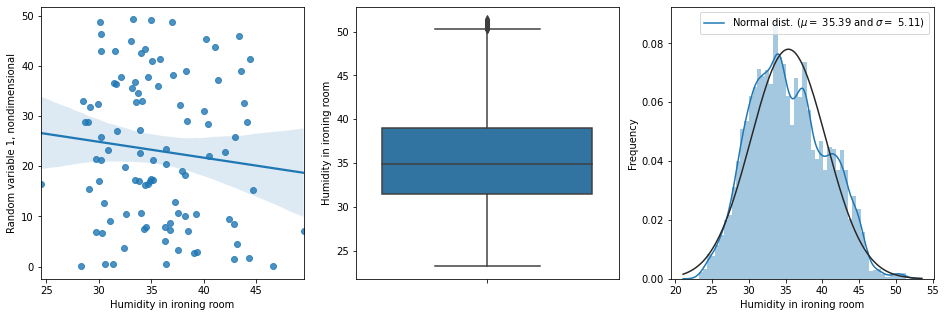

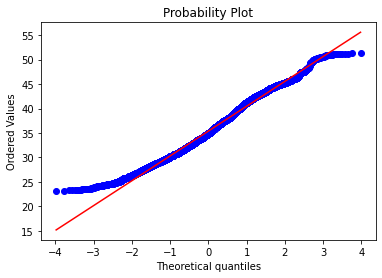

(<AxesSubplot:xlabel='Humidity in ironing room', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Humidity in ironing room'>,
 None)

In [45]:
visuals('Humidity in ironing room',

'Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 35.39 and sigma = 5.11



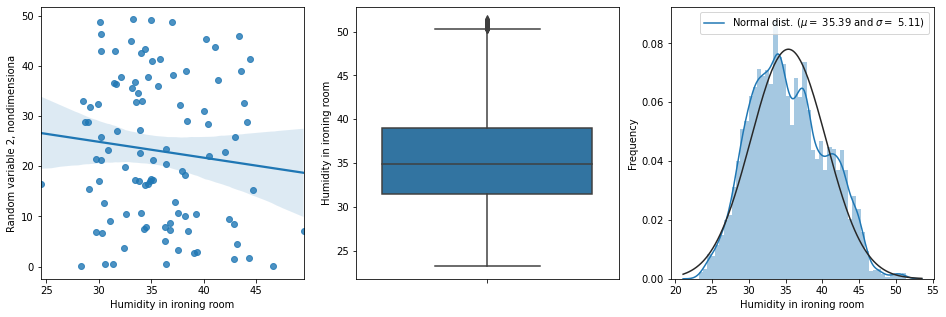

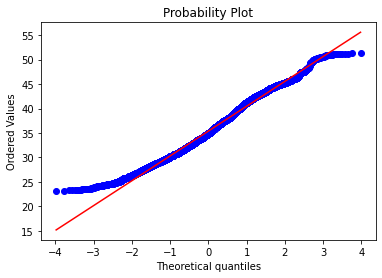

(<AxesSubplot:xlabel='Humidity in ironing room', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Humidity in ironing room'>,
 None)

In [46]:
visuals('Humidity in ironing room','Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 22.03 and sigma = 1.96



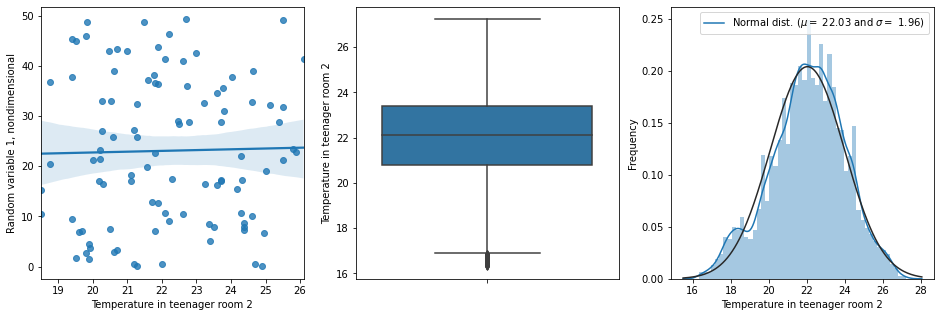

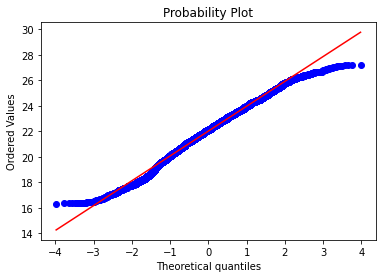

(<AxesSubplot:xlabel='Temperature in teenager room 2', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Temperature in teenager room 2'>,
 None)

In [47]:
visuals('Temperature in teenager room 2',
'Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 22.03 and sigma = 1.96



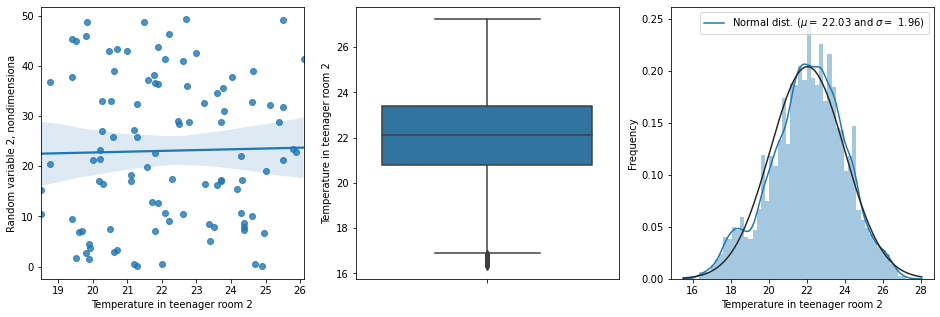

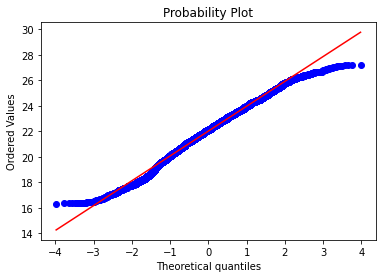

(<AxesSubplot:xlabel='Temperature in teenager room 2', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Temperature in teenager room 2'>,
 None)

In [48]:
visuals('Temperature in teenager room 2',
'Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 42.94 and sigma = 5.22



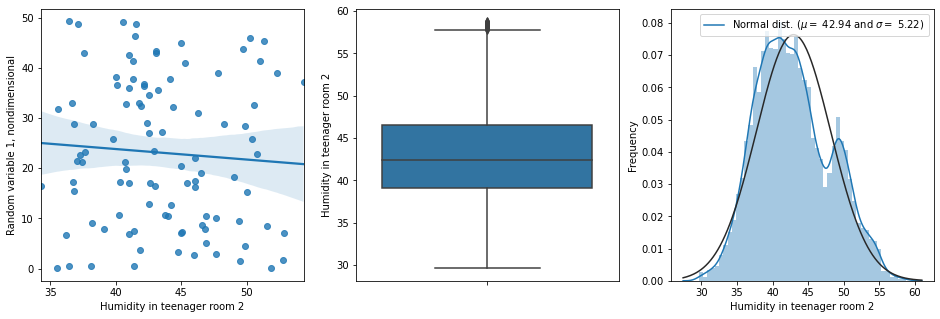

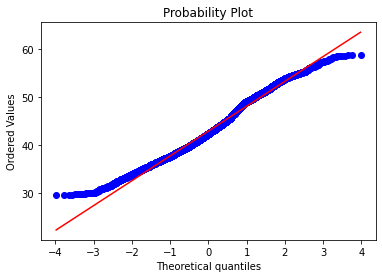

(<AxesSubplot:xlabel='Humidity in teenager room 2', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Humidity in teenager room 2'>,
 None)

In [49]:
visuals('Humidity in teenager room 2',
'Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 42.94 and sigma = 5.22



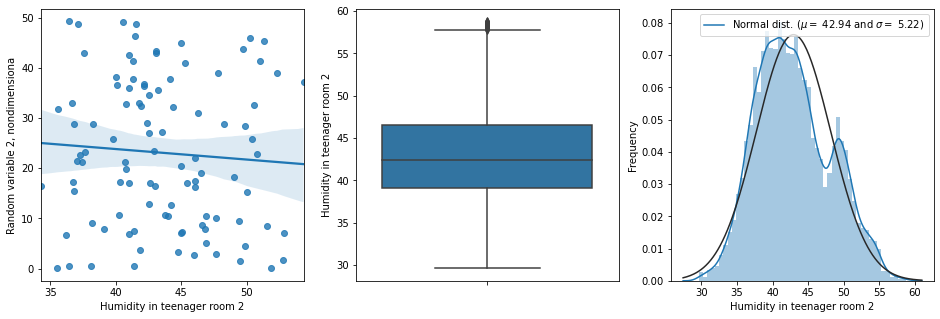

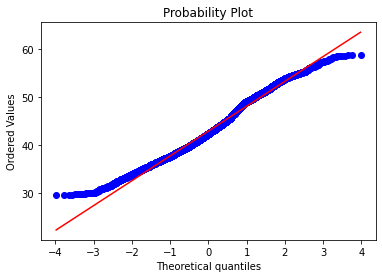

(<AxesSubplot:xlabel='Humidity in teenager room 2', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Humidity in teenager room 2'>,
 None)

In [50]:
visuals('Humidity in teenager room 2','Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 19.49 and sigma = 2.01



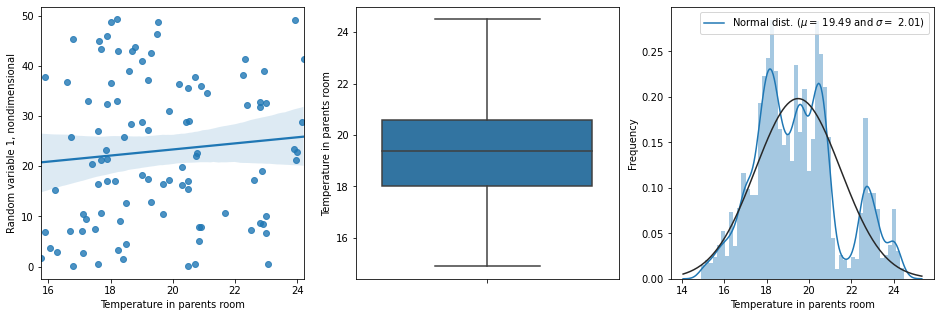

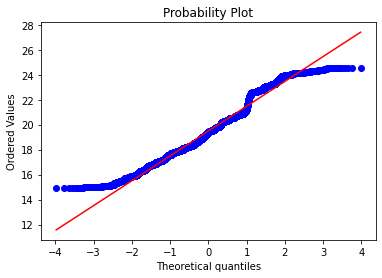

(<AxesSubplot:xlabel='Temperature in parents room', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Temperature in parents room'>,
 None)

In [51]:
visuals('Temperature in parents room',
'Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 19.49 and sigma = 2.01



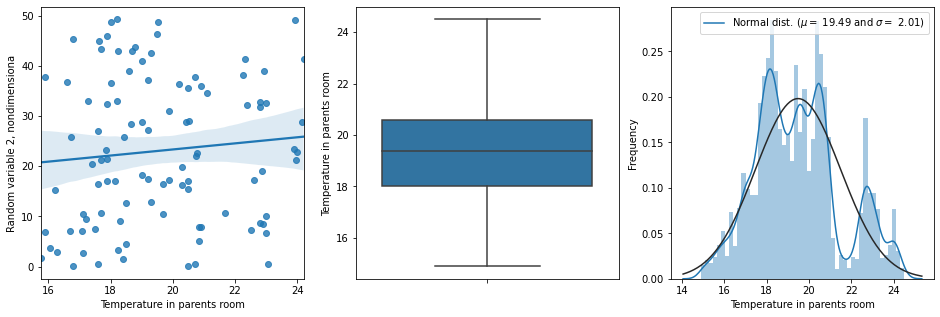

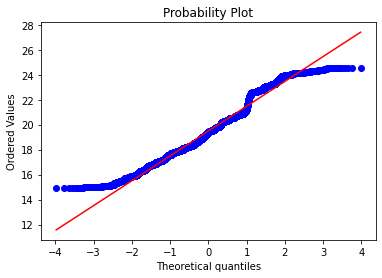

(<AxesSubplot:xlabel='Temperature in parents room', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Temperature in parents room'>,
 None)

In [52]:
visuals('Temperature in parents room',

'Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 41.55 and sigma = 4.15



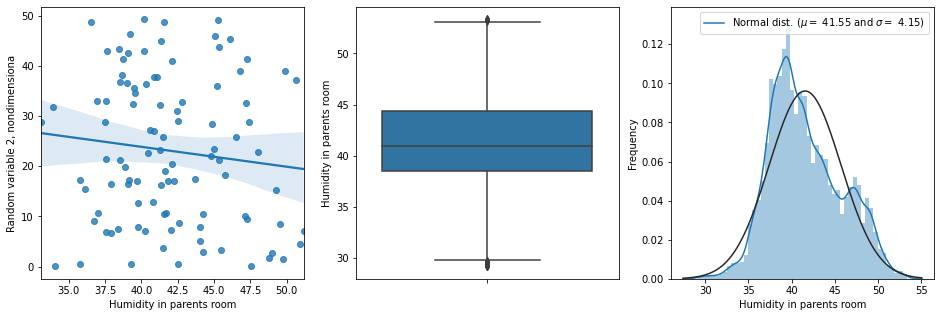

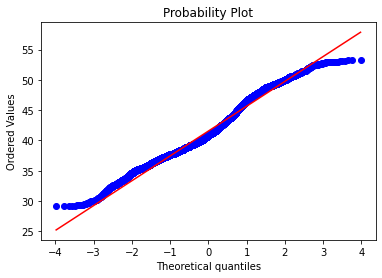

(<AxesSubplot:xlabel='Humidity in parents room', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Humidity in parents room'>,
 None)

In [53]:
visuals('Humidity in parents room',

'Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 41.55 and sigma = 4.15



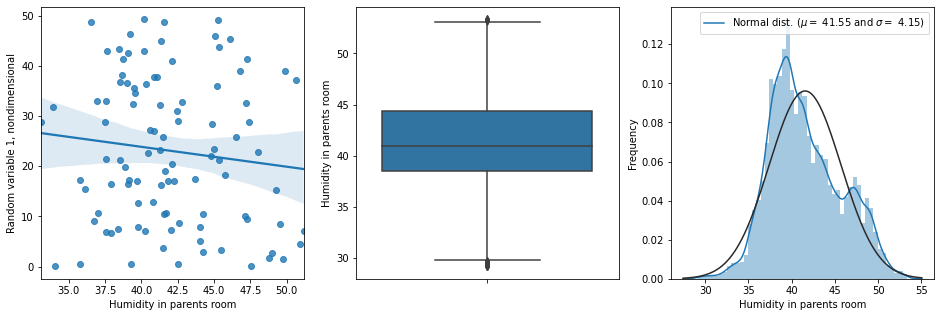

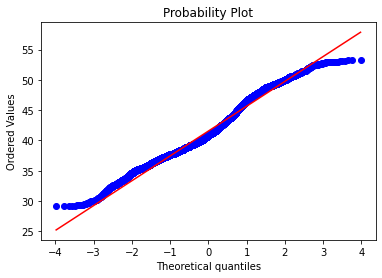

(<AxesSubplot:xlabel='Humidity in parents room', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Humidity in parents room'>,
 None)

In [54]:
visuals('Humidity in parents room',
'Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 755.52 and sigma = 7.40



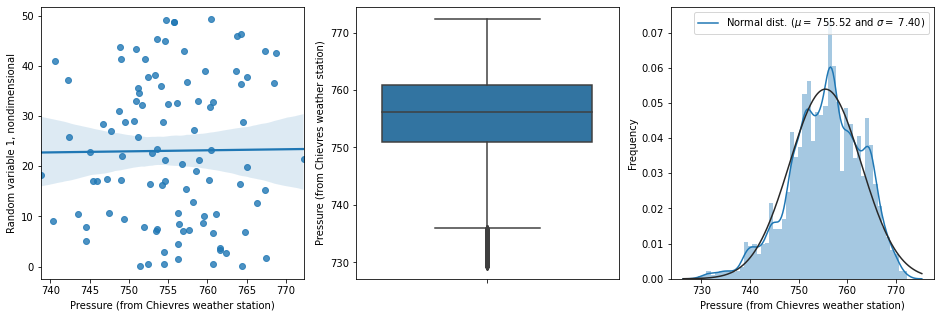

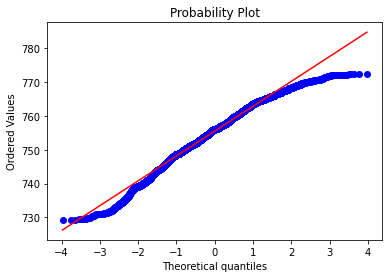

(<AxesSubplot:xlabel='Pressure (from Chievres weather station)', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Pressure (from Chievres weather station)'>,
 None)

In [57]:
visuals('Pressure (from Chievres weather station)',
'Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 755.52 and sigma = 7.40



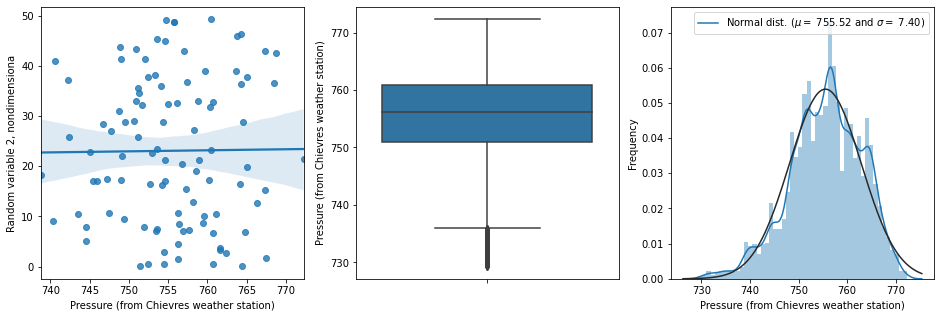

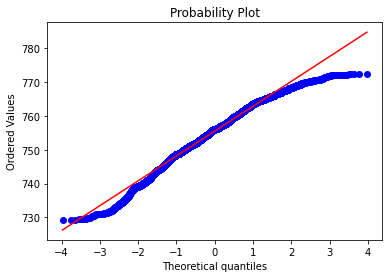

(<AxesSubplot:xlabel='Pressure (from Chievres weather station)', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Pressure (from Chievres weather station)'>,
 None)

In [58]:
visuals('Pressure (from Chievres weather station)',
'Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 79.75 and sigma = 14.90



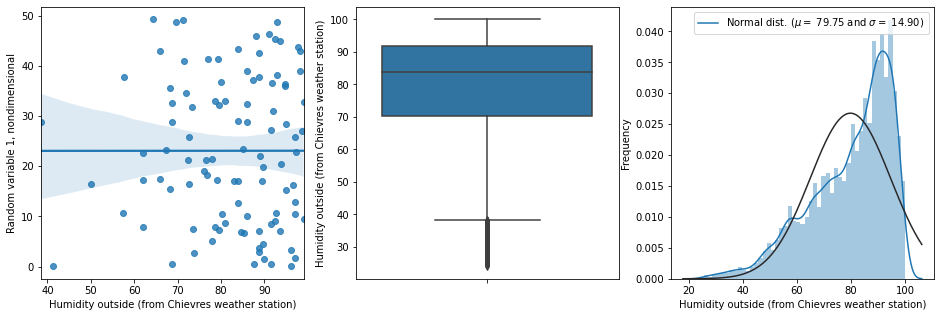

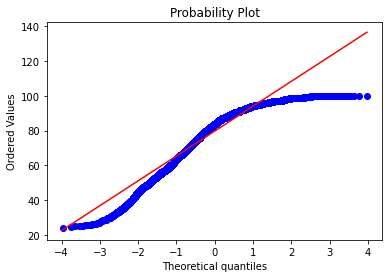

(<AxesSubplot:xlabel='Humidity outside (from Chievres weather station)', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel='Humidity outside (from Chievres weather station)'>,
 None)

In [60]:
visuals('Humidity outside (from Chievres weather station)','Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 79.75 and sigma = 14.90



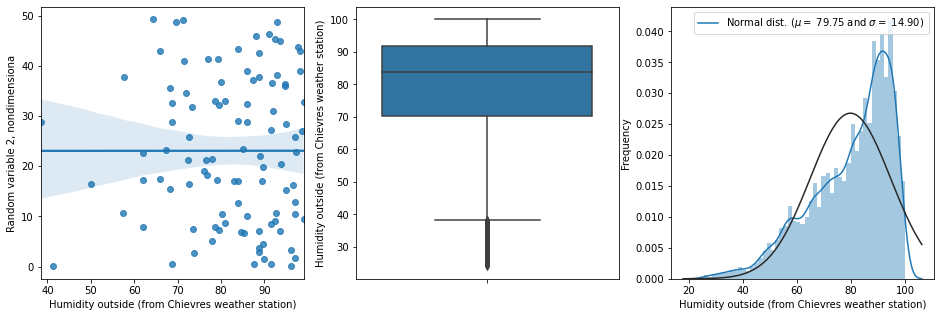

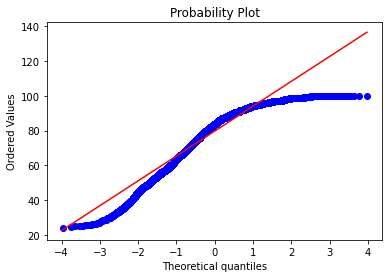

(<AxesSubplot:xlabel='Humidity outside (from Chievres weather station)', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel='Humidity outside (from Chievres weather station)'>,
 None)

In [61]:
visuals('Humidity outside (from Chievres weather station)','Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 4.04 and sigma = 2.45



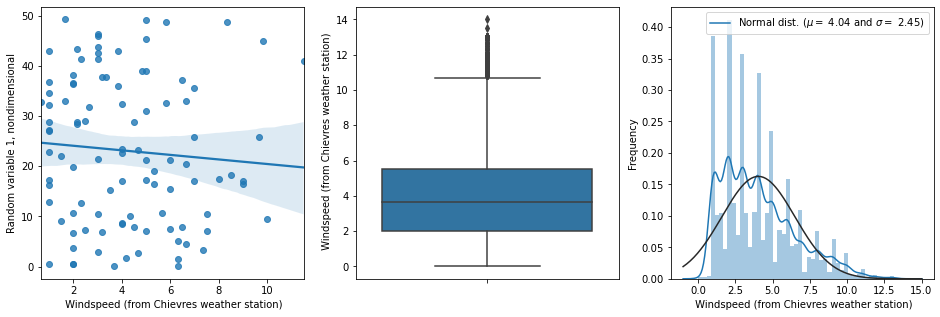

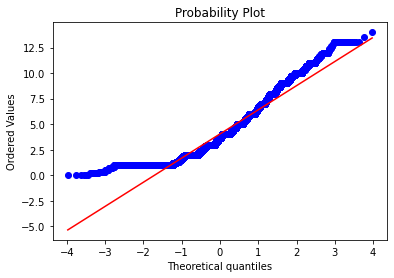

(<AxesSubplot:xlabel=' Windspeed (from Chievres weather station)', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel=' Windspeed (from Chievres weather station)'>,
 None)

In [62]:
visuals(' Windspeed (from Chievres weather station)',
'Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 4.04 and sigma = 2.45



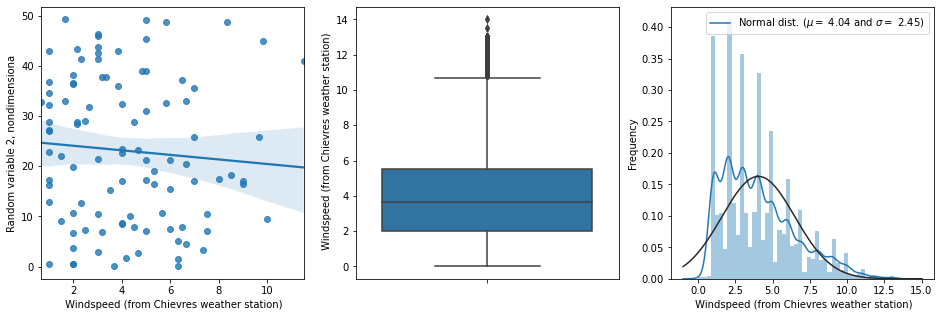

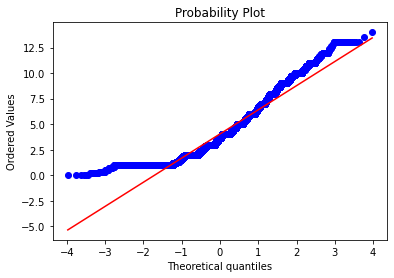

(<AxesSubplot:xlabel=' Windspeed (from Chievres weather station)', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel=' Windspeed (from Chievres weather station)'>,
 None)

In [63]:
visuals(' Windspeed (from Chievres weather station)',
'Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 38.33 and sigma = 11.79



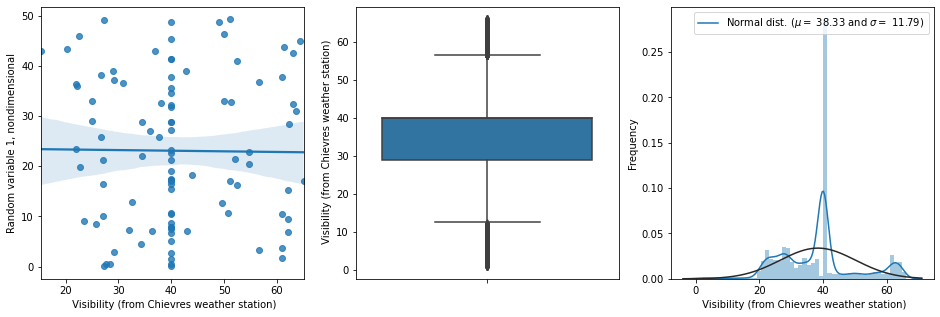

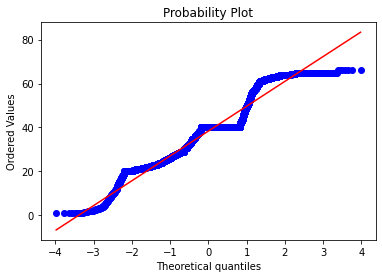

(<AxesSubplot:xlabel=' Visibility (from Chievres weather station)', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel=' Visibility (from Chievres weather station)'>,
 None)

In [64]:
visuals(' Visibility (from Chievres weather station)',
'Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 38.33 and sigma = 11.79



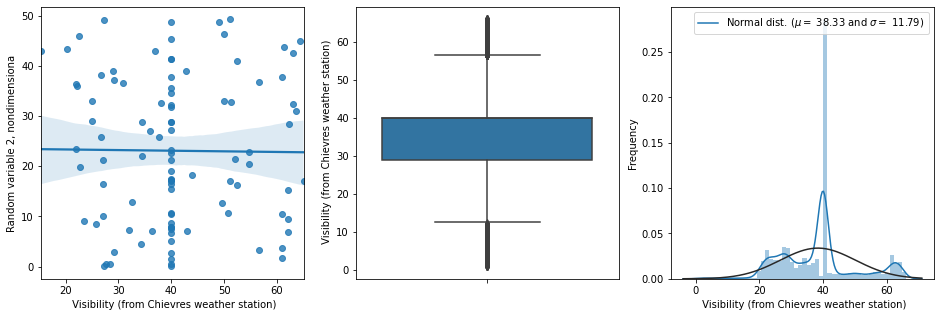

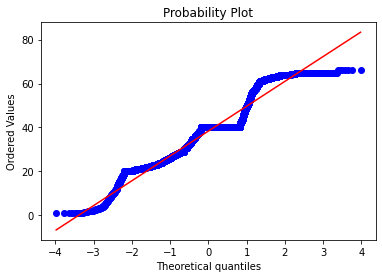

(<AxesSubplot:xlabel=' Visibility (from Chievres weather station)', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel=' Visibility (from Chievres weather station)'>,
 None)

In [65]:
visuals(' Visibility (from Chievres weather station)','Random variable 2, nondimensiona')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 3.76 and sigma = 4.19



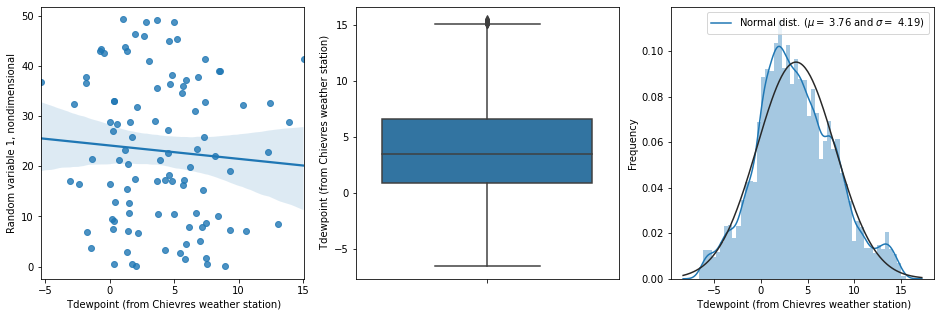

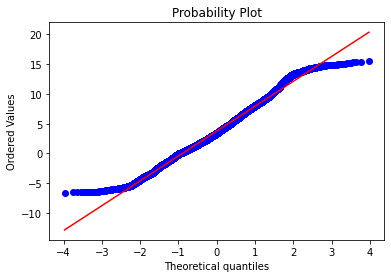

(<AxesSubplot:xlabel=' Tdewpoint (from Chievres weather station)', ylabel='Random variable 1, nondimensional'>,
 <AxesSubplot:ylabel=' Tdewpoint (from Chievres weather station)'>,
 None)

In [66]:
visuals(' Tdewpoint (from Chievres weather station)',
'Random variable 1, nondimensional')

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 3.76 and sigma = 4.19



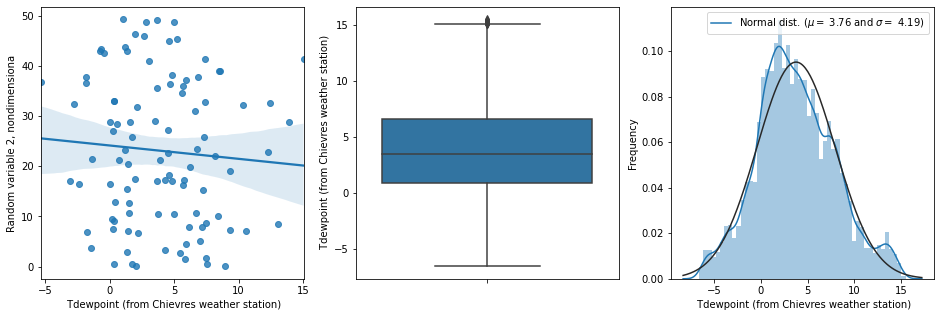

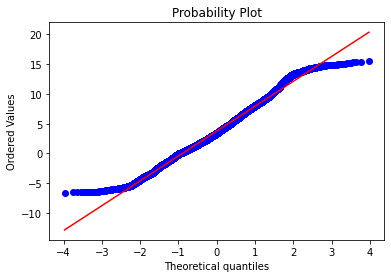

(<AxesSubplot:xlabel=' Tdewpoint (from Chievres weather station)', ylabel='Random variable 2, nondimensiona'>,
 <AxesSubplot:ylabel=' Tdewpoint (from Chievres weather station)'>,
 None)

In [67]:
visuals(' Tdewpoint (from Chievres weather station)','Random variable 2, nondimensiona')

In [69]:
quiz_data_for_use.corr()

Appliances    lights  \
Appliances                                          1.000000  0.197278   
lights                                              0.197278  1.000000   
Temperature in kitchen area                         0.055447 -0.023528   
Humidity in kitchen area                            0.086031  0.106968   
Temperature in living room area                     0.120073 -0.005622   
Humidity in living room area                       -0.060465  0.050985   
Temperature in laundry room area                    0.085060 -0.097393   
Humidity in laundry room area                       0.036292  0.131161   
Temperature in office room                          0.040281 -0.008859   
Humidity in office room                             0.016965  0.114936   
Temperature in bathroom                             0.019760 -0.078745   
Humidity in bathroom                                0.006955  0.141233   
Temperature outside the building                    0.117638 -0.079029   
Humidity outside the building                      -0.083178  0.153756   
Temperature in ironing room                         0.025801 -0.135347   
Humidity in ironing room                           -0.055642  0.035069   
Temperature in teenager room 2                      0.039572 -0.071458   
Humidity in teenager room 2                        -0.094039  0.012915   
Temperature in parents room                         0.010010 -0.157592   
Humidity in parents room                           -0.051462 -0.008766   
T_out                                               0.099155 -0.074424   
Pressure (from Chievres weather station)           -0.034885 -0.010576   
Humidity outside (from Chievres weather station)   -0.152282  0.068543   
 Windspeed (from Chievres weather station)          0.087122  0.060281   
 Visibility (from Chievres weather station)         0.000230  0.020038   
 Tdewpoint (from Chievres weather station)          0.015353 -0.036322   
Random variable 1, nondimensional                  -0.011145  0.000521   
Random variable 2, nondimensiona                   -0.011145  0.000521   

                                                  Temperature in kitchen area  \
Appliances                                                           0.055447   
lights                                                              -0.023528   
Temperature in kitchen area                                          1.000000   
Humidity in kitchen area                                             0.164006   
Temperature in living room area                                      0.836834   
Humidity in living room area                                        -0.002509   
Temperature in laundry room area                                     0.892402   
Humidity in laundry room area                                       -0.028550   
Temperature in office room                                           0.877001   
Humidity in office room                                              0.097861   
Temperature in bathroom                                              0.885247   
Humidity in bathroom                                                -0.014782   
Temperature outside the building                                     0.654769   
Humidity outside the building                                       -0.615045   
Temperature in ironing room                                          0.838705   
Humidity in ironing room                                             0.135182   
Temperature in teenager room 2                                       0.825413   
Humidity in teenager room 2                                         -0.006441   
Temperature in parents room                                          0.844777   
Humidity in parents room                                             0.071756   
T_out                                                                0.682846   
Pressure (from Chievres weather station)                            -0.150574   
Humidity outside (from Chievres weather 

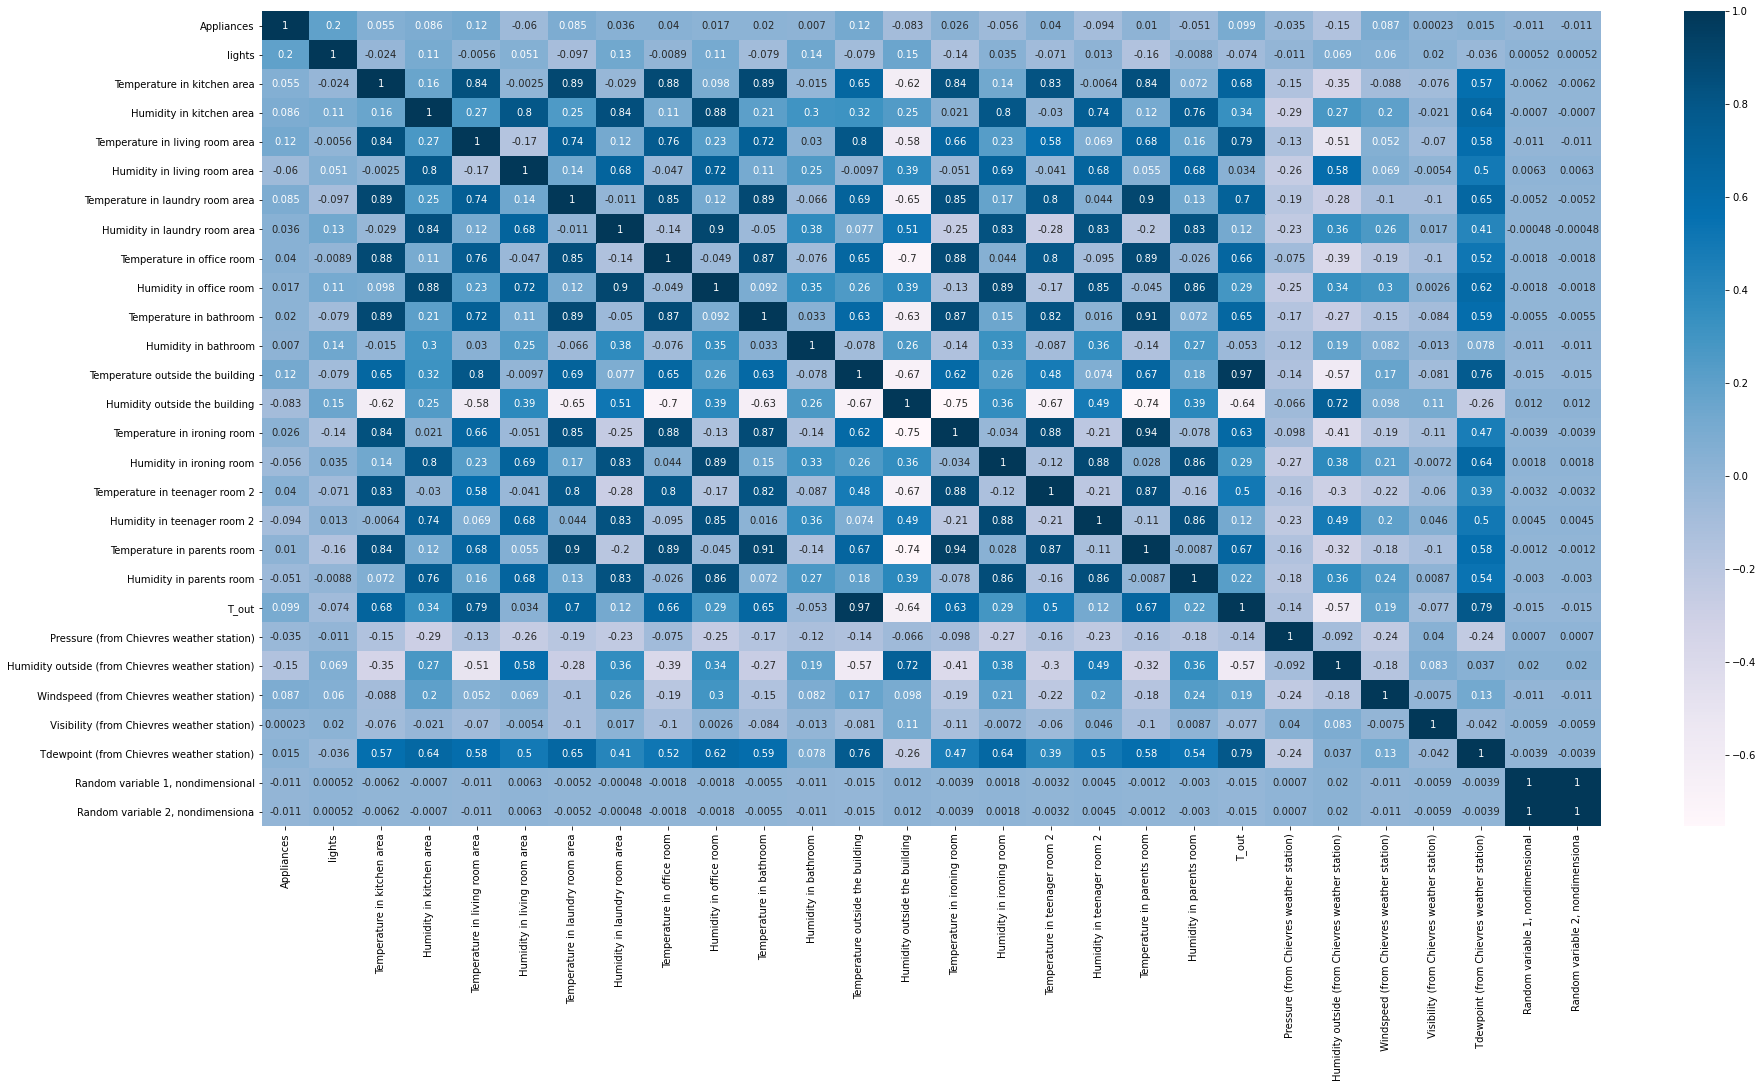

In [70]:
plt.figure(figsize=(30,15))
cor = quiz_data_for_use.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_cols = quiz_data_for_use.drop(columns="date")
date_col = quiz_data_for_use["date"]

normalised_data_df = pd.DataFrame(scaler.fit_transform(num_cols), columns=num_cols.columns)

normalised_data_df = pd.concat([date_col,normalised_data_df], axis=1)

In [73]:
normalised_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   date                                              19735 non-null  object 
 1   Appliances                                        19735 non-null  float64
 2   lights                                            19735 non-null  float64
 3   Temperature in kitchen area                       19735 non-null  float64
 4   Humidity in kitchen area                          19735 non-null  float64
 5   Temperature in living room area                   19735 non-null  float64
 6   Humidity in living room area                      19735 non-null  float64
 7   Temperature in laundry room area                  19735 non-null  float64
 8   Humidity in laundry room area                     19735 non-null  float64
 9   Temperature in of

In [75]:
from sklearn.model_selection import train_test_split

x = normalised_data_df.drop(columns=["Random variable 1, nondimensional", "Random variable 2, nondimensiona","date"])
y = normalised_data_df[["Random variable 1, nondimensional", "Random variable 2, nondimensiona"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [76]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13814, 26)
(5921, 26)
(13814, 2)
(5921, 2)


In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def calculate_metrics(y_test, y_pred):
    '''
    y_test:- Ground truth values
    y_pred:- Model predicted values
    '''
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scors = r2_score(y_test, y_pred)
    print("MSE:- {:.3f} \nRMSE:- {:.3f} \nR_Squared:- {:.3f}".format(mse, rmse, r2_scors))

In [80]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.001)
L1 = lasso_model.fit(x_train, y_train)
L1_pred = L1.predict(x_test) # Lasso Regression
calculate_metrics(y_test, L1_pred)

MSE:- 0.084 
RMSE:- 0.289 
R_Squared:- -0.000


In [78]:
from sklearn.linear_model import LinearRegression


linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predictions = linear_model.predict(x_test)
calculate_metrics(y_test, predictions)

MSE:- 0.084 
RMSE:- 0.290 
R_Squared:- -0.004


In [79]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
L2 = ridge_model.fit(x_train, y_train)
L2_pred = L2.predict(x_test) # Ridge Regression
calculate_metrics(y_test, L2_pred)

MSE:- 0.084 
RMSE:- 0.290 
R_Squared:- -0.004


In [82]:
from sklearn.model_selection import train_test_split

x = normalised_data_df[["Temperature in living room area"]]
y = normalised_data_df[["Temperature outside the building"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [83]:
from sklearn.linear_model import LinearRegression


linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predictions = linear_model.predict(x_test)
calculate_metrics(y_test, predictions)


MSE:- 0.011 
RMSE:- 0.105 
R_Squared:- 0.646


In [84]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
mae 

0.08200493583514944

C:\Users\Ntui Aqua\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature in living room area', ylabel='Temperature outside the building'>

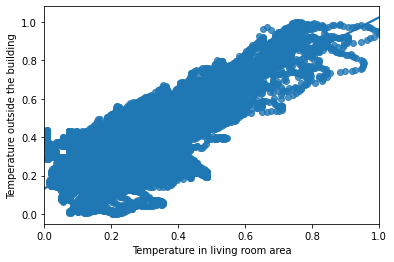

In [85]:
sns.regplot(x, y, data=normalised_data_df)

In [86]:
calculate_metrics(x, y)

MSE:- 0.021 
RMSE:- 0.146 
R_Squared:- 0.163


In [87]:
linear_model.coef_

array([[0.89003912]])